# Twitter Sentiment Analysis

The tweets from the dataset are categorized and computationaly identified for analyzing the writers attitude towards a particular topic, is positive, negitive or neutral

In [1]:
# lets import the necessary libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud, STOPWORDS

In [2]:
data = pd.read_csv('../Twitter sentiment analysis/data/Sentiment.csv')
data

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [4]:
# using the necessary columns
data = data[['text','sentiment']]

In [5]:
data

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


Lets split the data into train and test set(10%).

Lets drop the "Neutral" tweets as we will be predicting only positive and negitive sentiment

In [6]:
train, test = train_test_split(data,test_size =0.1)
train = train[train.sentiment !=  'Neutral']

Lets separated the Positive and Negative tweets of the training set in order to easily visualize their contained words.

In [7]:
pos_train = train[train['sentiment']=='Positive']
pos_train = pos_train['text']
pos_train

6214     No matter what @realDonaldTrump was the reason...
2452     Just had a great time taping @News12NJ for Pow...
3747     @FrankLuntz LOL he probably likes loser candid...
1173     @FoxNews failed @megynkelly appeared follish a...
12941    RT @Lrihendry: #TedCruz headed into the Presid...
                               ...                        
9395     Love how Rubio said the election is not about ...
6416     RT @RandPaul: Rand Paul Is Leading The Fight T...
10317    Kasich has the least-dead eyes of the bunch. #...
496      Kind of glad I didn't get to watch the #GOPDeb...
9859     Who won the #GOPDebates ? I'd say it's between...
Name: text, Length: 2026, dtype: object

In [8]:
neg_train = train[train['sentiment']=='Negative']
neg_train = neg_train['text']
neg_train

6711     Thanks to #NetNeutrality #BlackTwitter gave me...
8848     RT @RWSurferGirl: I'm really really really pis...
5535     Stop the world, I want to get off: http://t.co...
3494     Were the #Koch brothers disappointed that the ...
98       RT @TheBaxterBean: Marco Rubio Told To His Fac...
                               ...                        
13501    Carson says "Epitome of the secular progressiv...
12396    RT @RWSurferGirl: The candidates don't have to...
3052     My takeaway from the #GOPDebate is that the #G...
12751    RT @RWSurferGirl: Thanks Fox News, you're rais...
2414     RT @kc5lei: My opinion of #MeganKelly has real...
Name: text, Length: 7667, dtype: object

Clean the text from hashtags, mentions and links.

Generate a WordCloud visualization which shows only the most emphatic words of the Positive and Negative tweets.

In [9]:
import matplotlib.pyplot as plt
def WC(data,color ='blue'):
    words = ' '.join(data)
    cleaned_words = " ".join([word for word in words.split()
                              if 'http' not in word and not word.startswith('@') 
                              and not word.startswith('#') and
                              word != 'RT'])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color=color,
                          width=2500,
                          height=2000,
                          ).generate(cleaned_words)
    plt.figure(1,figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

positive words


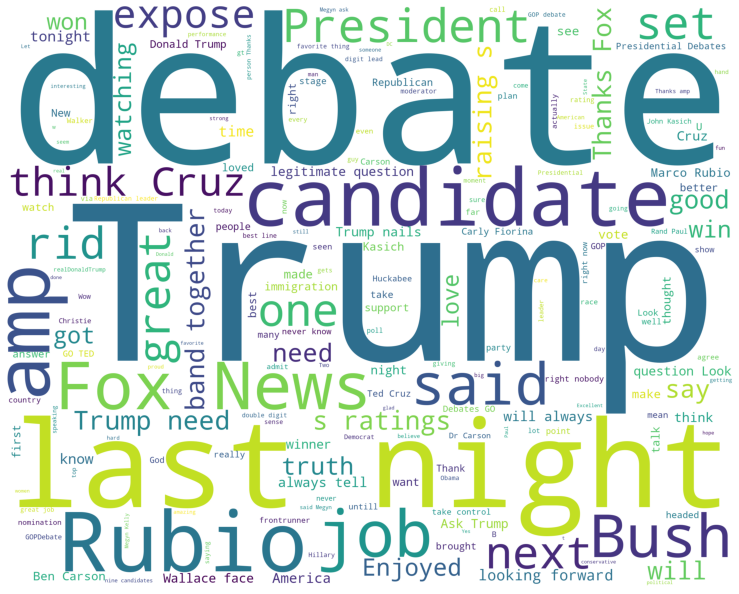

In [10]:
print('positive words')
WC(pos_train, 'white')

negative words


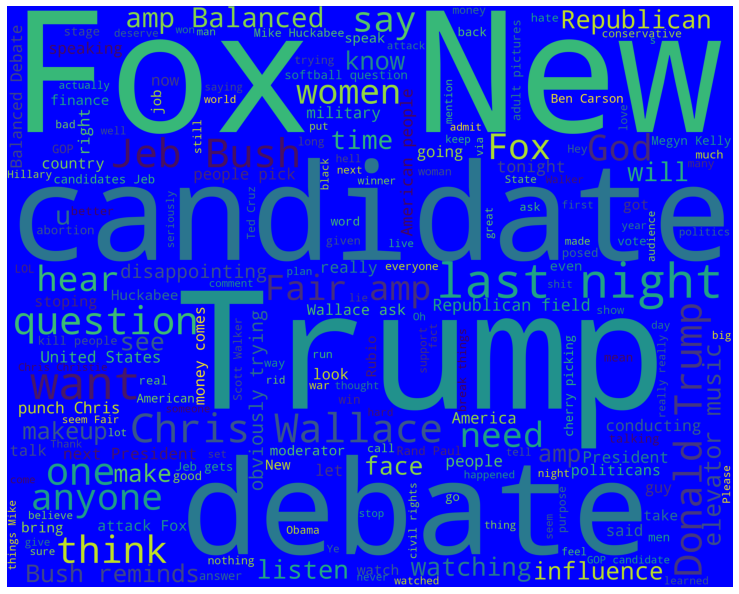

In [11]:
print('negative words')
WC(neg_train) 

`Stop Word: Stop Words are words which do not contain important significance to be used in Search Queries.Usually these words are filtered out from search queries because they return vast amount of unnecessary information. ( the, for, this etc. )`

In [16]:
for index, row in train.iterrows():
  print(index,'+',row)
  break

6711 + text         Thanks to #NetNeutrality #BlackTwitter gave me...
sentiment                                             Negative
Name: 6711, dtype: object


In [35]:


tweets =[]
stopwords_set = set(stopwords.words("english"))
for index, row in train.iterrows():
  words_filtered =[e.lower() for e in row.text.split() if len(e) >= 3]
  words_cleaned = [word for word in words_filtered
                   if word != 'RT'
                   and not word.startswith('@')
                   and not word.startswith('#')
                   and word != 'RT']
  words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
  tweets.append((words_without_stopwords,row.sentiment))

positive_test = test[test['sentiment'] =='Positive']
positive_test = positive_test['text']
negitive_test = test[test['sentiment'] =='Negative']
negitive_test = negitive_test['text']

In [21]:
#extracting word features
def get_words(tweets):
  all =[]
  for (words,sentiment) in tweets:
    all.extend(words)
  return all

w = get_words(tweets)
# print(w)

In [25]:
def feature_ext(wordlist):
  wordlist = nltk.FreqDist(wordlist)
  features = wordlist.keys()
  return features

ft=feature_ext(w)
# print(ft)

In [26]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in ft:
        features['contains(%s)' % word] = (word in document_words)
    return features

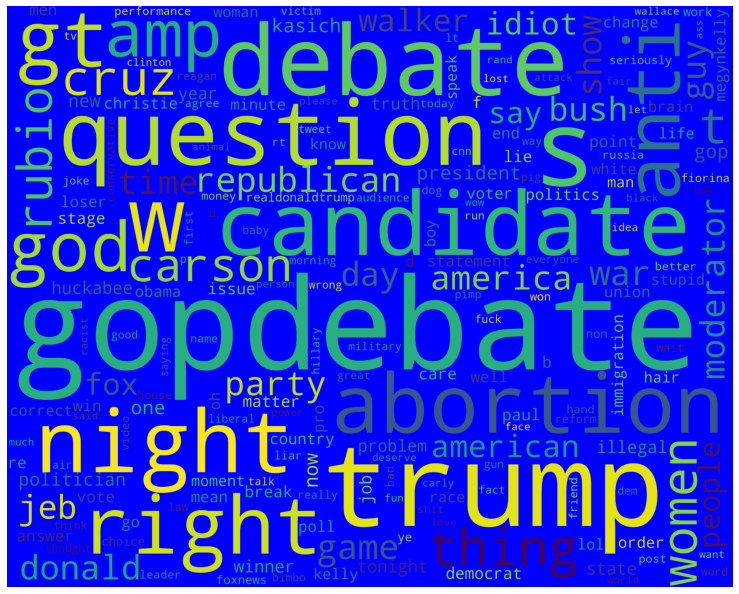

In [28]:
WC(ft)

In [29]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [36]:
#crude testing
neg =0
pos =0
for t in negitive_test:
  result = classifier.classify(extract_features(t.split()))
  if result == 'Negative':
    neg += 1
for t in positive_test:
  result = classifier.classify(extract_features(t.split()))
  if result == 'Positive':
    pos += 1
print("Negative: {}/{}".format(neg,len(negitive_test)))
print("Positive: {}/{}".format(pos,len(positive_test)))

Negative: 784/826
Positive: 79/210
